In [1]:
!pip install kaggle
!mkdir /root/.kaggle
!echo '{"username":"michalgasiorowski","key":"64ed31a01f3f866630e66b5427dd6682"}' > /root/.kaggle/kaggle.json


In [2]:
!kaggle competitions download -c titanic

  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.90MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 89.7MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 26.5MB/s]


In [3]:
!ls

gender_submission.csv  sample_data  test.csv  train.csv


In [0]:
import os
import pandas as pd

def load_titanic_dateset(titanic_path='/content'):
  gender_submission_csv_path = os.path.join(titanic_path, "gender_submission.csv")
  train_csv_path = os.path.join(titanic_path, "train.csv")
  test_csv_path = os.path.join(titanic_path, "test.csv")
  return pd.read_csv(gender_submission_csv_path), pd.read_csv(train_csv_path), pd.read_csv(test_csv_path)
  #return pd.read_csv


In [0]:
gender_sub, train, test = load_titanic_dateset()

In [6]:
train.describe(), train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
 count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
 mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
 std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
 min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
 25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
 50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
 75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
 max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200
 
 [8 rows x 7 columns], None)

In [7]:
train["Ticket"].value_counts(), train["SibSp"].value_counts(), train["Embarked"].value_counts(), train["Cabin"].value_counts()

(347082              7
 1601                7
 CA. 2343            7
 347088              6
 CA 2144             6
                    ..
 28425               1
 330980              1
 3101298             1
 STON/O2. 3101271    1
 2686                1
 Name: Ticket, Length: 681, dtype: int64, 0    608
 1    209
 2     28
 4     18
 3     16
 8      7
 5      5
 Name: SibSp, dtype: int64, S    644
 C    168
 Q     77
 Name: Embarked, dtype: int64, C23 C25 C27    4
 B96 B98        4
 G6             4
 E101           3
 F33            3
               ..
 D11            1
 E50            1
 E77            1
 E49            1
 B37            1
 Name: Cabin, Length: 147, dtype: int64)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b5258d400>,
      dtype=object)

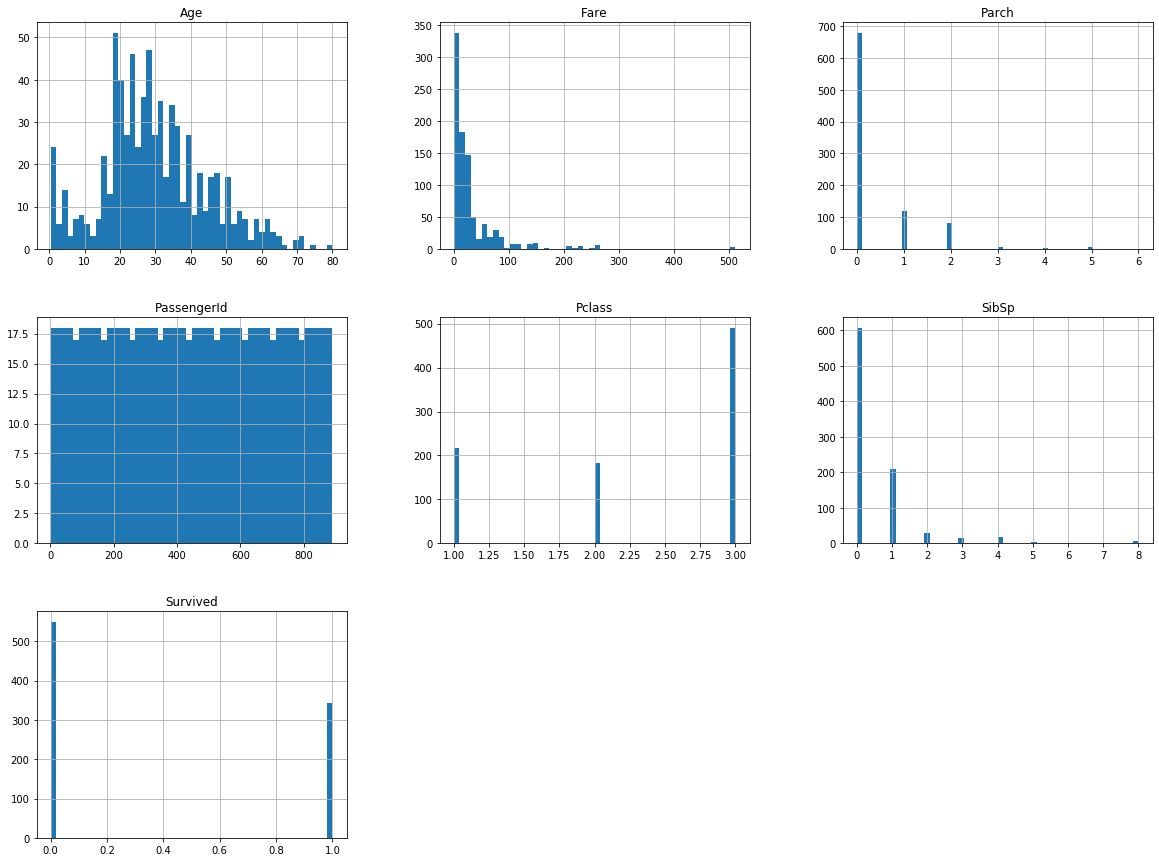

In [8]:
import matplotlib.pyplot as plt

train.hist(bins=50, figsize=(20,15))

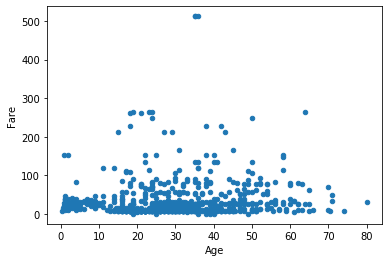

In [9]:
train.plot(kind="scatter", x="Age", y="Fare")

In [0]:
corr_matrix = train.corr()


In [11]:
# Survival is correlated to Fare price :) No shit sherlock :)
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b4f188d68>,
      dtype=object)

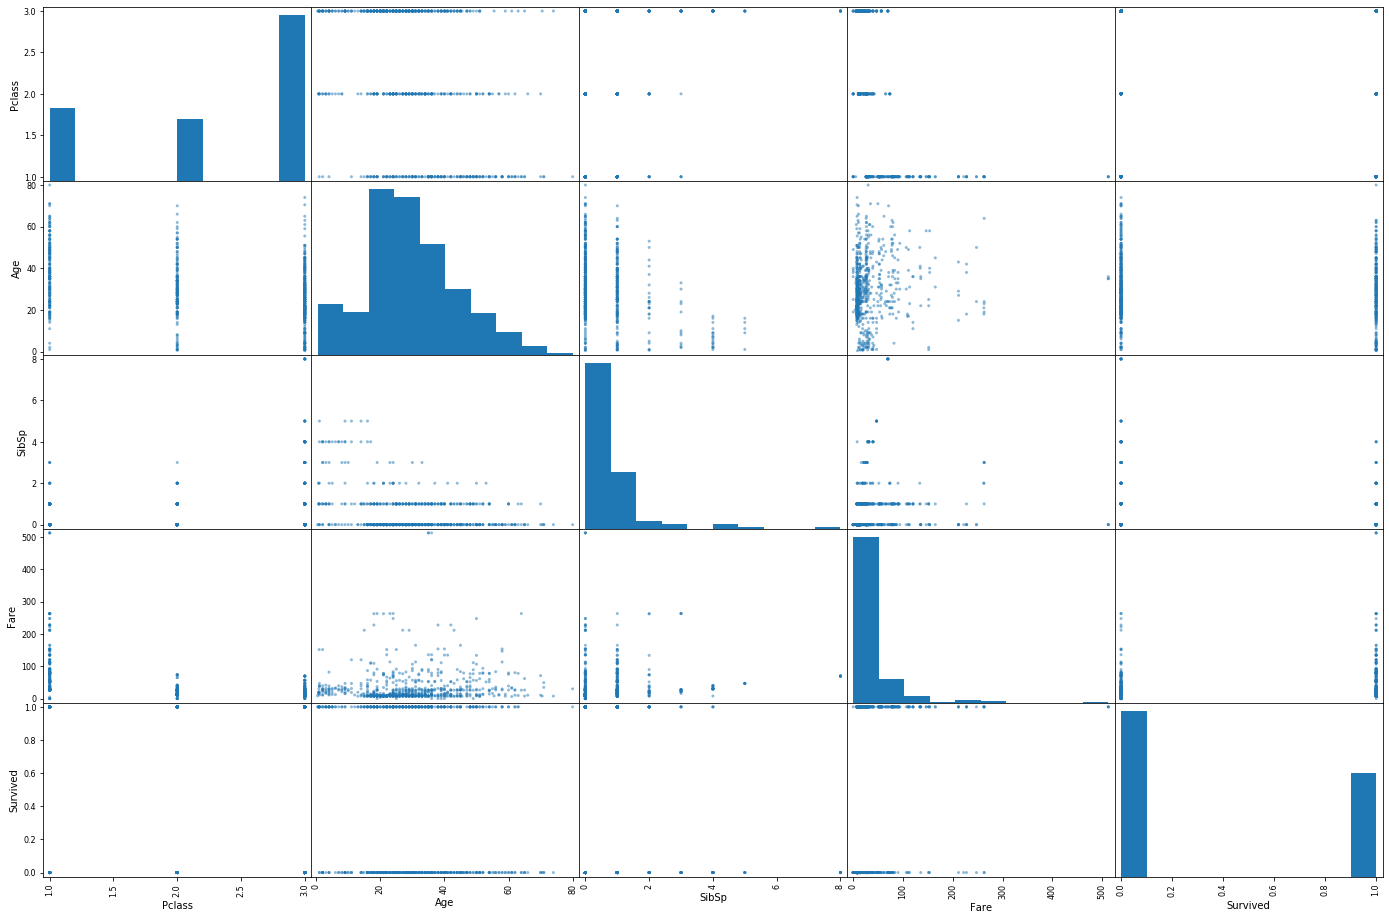

In [12]:
# PassengerId    891 non-null int64
# Survived       891 non-null int64
# Pclass         891 non-null int64
# Name           891 non-null object
# Sex            891 non-null object
# Age            714 non-null float64
# SibSp          891 non-null int64
# Parch          891 non-null int64
# Ticket         891 non-null object
# Fare           891 non-null float64
# Cabin          204 non-null object
# Embarked       889 non-null object

from pandas.plotting import scatter_matrix

attributes = ["Pclass", "Sex", "Age", "SibSp", "Fare", "Survived" ]
scatter_matrix(train[attributes], figsize=(24, 16))


In [0]:
train_data = train.drop("Survived", axis=1)
train_labels = train["Survived"].copy()

In [14]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
# Categorical Attributes
# Missing Values
# Numerical attributes

nummerical_attributes = []
categorical_attributes = ["Pclass", "Sex", "Embarked"]
to_drop_attributes = ["Cabin", "Ticket", "Name"]

In [19]:
train['PassengerId'].is_unique

True

In [0]:
train.set_index("PassengerId", inplace=True)

In [21]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
 ('imputer')                        
])

In [0]:
from sklearn.compose import ColumnTransformer

nummerical_attributes = 
#num_pipeline 